###  01. Open and display Image

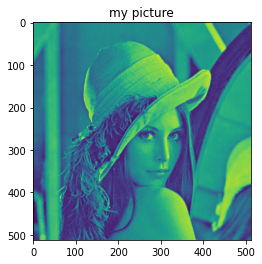

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import cv2

img = cv2.imread('images/input.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray)   ### used matplotlib directoly, cv2.imshow will open additiona python window 
plt.title('my picture')
plt.show()

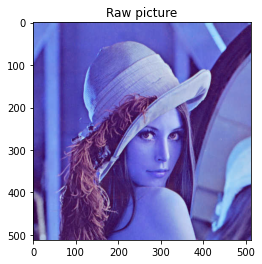

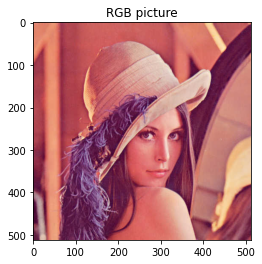

In [6]:
import cv2

original_img = cv2.imread("images/input.jpg")   ### CV use BGR, plt expect to be RGB
rgb_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)


#cv2.imshow("Input image",original_img)  ## use this method will open new python window, inline not work 
# cv2.waitKey(0)
# cv2.destroyAllWindows()


plt.imshow(original_img)   ### used matplotlib directoly, cv2.imshow will open additiona python window 
plt.title('Raw picture')
plt.show()

plt.imshow(rgb_img)   ### used matplotlib directoly, cv2.imshow will open additiona python window 
plt.title('RGB picture')
plt.show()

### 02. Save Image

In [ ]:
import cv2

gray_img = cv2.imread("images/input.jpg", cv2.IMREAD_GRAYSCALE)


# cv2.imshow("Grayscale", gray_img)
# cv2.waitKey(1000)
# cv2.destroyAllWindows()

cv2.imwrite("images/output.jpg", gray_img)
cv2.imwrite("images/output2.png", gray_img, [cv2.IMWRITE_PNG_COMPRESSION])  ## 存为PNG格式



### 03. 来个滤镜

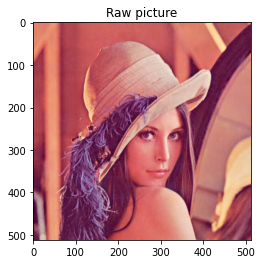

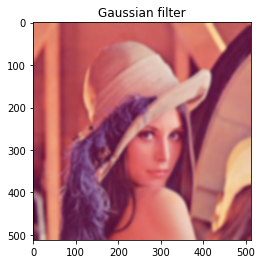

In [4]:
import cv2

img = cv2.imread("images/input.jpg")
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#cv2.imshow("Input", img)
plt.imshow(rgb_img)
plt.title('Raw picture')
plt.show()

img_gaussian = cv2.GaussianBlur(rgb_img, (17, 17), 0)
#cv2.imshow("Gaussian filter", img_gaussian)

plt.imshow(img_gaussian)
plt.title('Gaussian filter')
plt.show()

#cv2.waitKey()


In [1]:
### 想试其他的参考 https://bbs.huaweicloud.com/blogs/297013  ， 以下为一个素描滤镜

import cv2
import numpy as np

#读取原始图像
img = cv2.imread('images/input.jpg')

#图像灰度处理
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

#高斯滤波降噪
gaussian = cv2.GaussianBlur(gray, (5,5), 0)
 
#Canny算子
canny = cv2.Canny(gaussian, 50, 150)

#阈值化处理
ret, result = cv2.threshold(canny, 100, 255, cv2.THRESH_BINARY_INV)

#显示图像
cv2.imshow('src', img)
cv2.imshow('result', result)
cv2.waitKey()
cv2.destroyAllWindows()

### 04. 图像边界识别

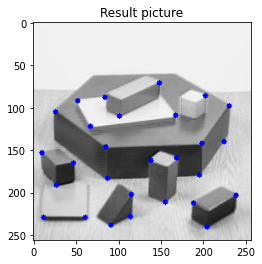

In [4]:
"""
Example:
Detect corners in an image.
"""

%matplotlib inline
from matplotlib import pyplot as plt
import cv2

img = cv2.imread("images/blox.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#cv2.imshow("Input image", img)

corners = cv2.goodFeaturesToTrack(
    gray, maxCorners=30, qualityLevel=0.05, minDistance=25)

red_color = (0, 0, 255)

for item in corners:
    x, y = item[0]  ## center 必须用int 

    #https://www.geeksforgeeks.org/python-opencv-cv2-circle-method/
    cv2.circle(img, (int(x), int(y)), 3, red_color, -1)

    
plt.imshow(img)
plt.title('Result picture')
plt.show()

# cv2.imshow("Top 'k' features", img)
# cv2.waitKey()

### 05. 来个视频

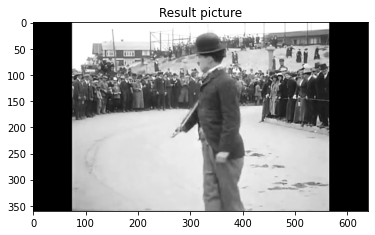

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import cv2

cap = cv2.VideoCapture("videos/chaplin.mp4")

# Check if the video is opened correctly
if not cap.isOpened():
    raise IOError("Could not open video")

frames_to_read = 120
frame_list = []

for i in range(frames_to_read):
    ret, frame = cap.read()

    if ret:
        frame_list.append(frame)

cap.release()

# Show the 10th frame
#cv2.imshow("Frame 10", frame_list[10])

plt.imshow(frame_list[10])
plt.title('Result picture')
plt.show()

#cv2.waitKey()

In [2]:
"""
Play a video.
"""

import cv2

cap = cv2.VideoCapture("videos/chaplin.mp4")

# Check if the video is opened correctly
if not cap.isOpened():
    raise IOError("Could not open video")

while True:
    ret, frame = cap.read()

    if ret:
        cv2.imshow("Input", frame)

    # Wait press ESC
    c = cv2.waitKey(10)
    if c == 27:
        break

cap.release()

### 06. 做脸部识别

In [3]:
"""
Example:
Detect human faces from a webcam.
"""

import cv2

cap = cv2.VideoCapture("videos/05-1.avi")

# Check if the webcam is opened correctly
if not cap.isOpened():
    raise IOError("Cannot open webcam")

# Loads the classifier
face_detect = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')  

while True:
    ret, frame = cap.read()

    if not ret:
        break

    # Detect faces
    face_rects = face_detect.detectMultiScale(
        frame, scaleFactor=1.3, minNeighbors=3)

    # Draw a rectangle in image
    for (x, y, w, h) in face_rects:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 3)

    cv2.imshow("Face Detector", frame)

    c = cv2.waitKey(30)
    if c == 27:
        break

cap.release()

In [2]:
### 用摄像头作为源，并动态识别物体边界


import cv2

cap = cv2.VideoCapture(0)

# Check if the webcam is opened correctly
if not cap.isOpened():
    raise IOError("Cannot open webcam")

while True:
    ret, img = cap.read()

    if not ret:
        break

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    corners = cv2.goodFeaturesToTrack(
        gray, maxCorners=30, qualityLevel=0.05, minDistance=25)

    red_color = (0, 0, 255)

    for item in corners:
        x, y = item[0]
        cv2.circle(img, (int(x), int(y)), 6, red_color, -1)

    cv2.imshow("Input", img)

    # Wait press ESC
    c = cv2.waitKey(1)
    if c == 27:
        break

cap.release()